In [1]:
# -*- coding: UTF-8 -*-


import geopy.distance
import csv
import pickle
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


def calc_dist(start_coord: tuple, dest_coord: tuple) -> float:
    """

    :param start_coord:         (start latitude, start longitude)
    :param dest_coord:          (dest latitude, dest longitude)
    :return:                    linear distance between start and destination, in km
    """
    return geopy.distance.geodesic(start_coord, dest_coord).km


def calc_weight(distance: float, distance_max: float, airline: int) -> float:
    """

    :param distance:        distance of the edge
    :param airline:         number of airline
    :param distance_max:    maximum distance
    :return:                weight of the edge range from [0, 1]
    """

    """
    General Statistic Data
    -------------------------------------------
    std of distance info:    2020.1571858791772
    mean of distance info:   1851.8100171736605
    median of distance info: 1195.8845359502072
    max of distance info:    13804.402294725593

    std of airline:          1.2853277067594049
    mean of airline:         1.8069758652340586
    median of airline:       1.0
    max of airline:          20.0
    """

    # weight for each parameter
    distance_weight = 0.5
    airline_weight = 1 - distance_weight

    # get the fixed weight
    dest_fixed = distance / 8000
    airline_fixed = 1 / airline

    return airline_fixed * airline_weight + dest_fixed * distance_weight


airport = {}  # key: IATA code value: [latitude, longitude, altitude]
routes = []  # [start id, dist id, distance]

with open("airports.dat.txt", "r", newline='', encoding="utf-8") as f:
    csv_content = csv.reader(f, delimiter=',')
    for row in csv_content:
        airport[row[4]] = (float(row[6]), float(row[7]), float(row[8]))

print("fetch: ", len(airport.keys()), "airports")

with open("routes.dat.txt", "r", encoding="utf-8") as f:
    csv_content = csv.reader(f, delimiter=',')
    fail_count = 0
    for row in csv_content:
        start_airport = row[2]
        dest_airport = row[4]
        try:
            start_airport_dist = airport[start_airport]
            dest_airport_dist = airport[dest_airport]
        except KeyError:
            fail_count += 1
            continue
        dist = calc_dist(start_airport_dist[:2], dest_airport_dist[:2])
        routes.append([start_airport, dest_airport, dist])

print("fail: ", fail_count)
print("miss rate: ", str(fail_count / len(routes)))

# calculate weight and update routes
routes_ = np.array(routes, dtype=str)
route_flat = []

for i in routes_:
    route_flat.append(i[0] + i[1])

c = Counter(route_flat)

dist_inf = routes_[:, 2].astype(float)
dist_max = float(np.max(dist_inf))

fetch:  6073 airports
fail:  729
miss rate:  0.010891325783607733


(array([37646., 17244.,  5581.,  1614.,  1800.,  1349.,   981.,   419.,
          226.,    74.]),
 array([    0.        ,  1380.44022947,  2760.88045895,  4141.32068842,
         5521.76091789,  6902.20114736,  8282.64137684,  9663.08160631,
        11043.52183578, 12423.96206525, 13804.40229473]),
 <BarContainer object of 10 artists>)

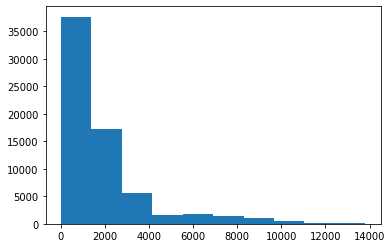

In [7]:
plt.hist(dist_inf)

(array([3.0125e+04, 5.3020e+03, 1.1410e+03, 3.3100e+02, 1.1500e+02,
        2.4000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

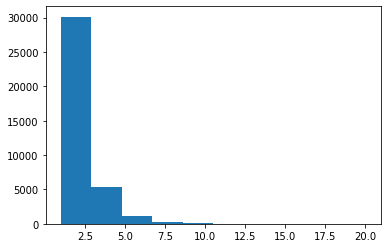

In [5]:
plt.hist(c.values())

In [8]:
max(dist_inf)

13804.402294725593

In [14]:
plt.hist(routes_[:,2])

(array([ 9166., 10581.,  8149.,  8319.,  6058.,  5174.,  5829.,  5229.,
         4654.,  3775.]),
 array([    0.,  1893.,  3786.,  5679.,  7572.,  9465., 11358., 13251.,
        15144., 17037., 18930.]),
 <BarContainer object of 10 artists>)

Error in callback <function flush_figures at 0x00000240FF42E040> (for post_execute):



KeyboardInterrupt



In [15]:
routes_ = np.array(routes, dtype=str)
route_flat = []

for i in routes_:
    route_flat.append(i[0] + i[1])

c = Counter(route_flat)

dist_inf = routes_[:, 2].astype(float)
dist_max = float(np.max(dist_inf))

for i in range(len(routes)):
    flat_name = routes[i][0] + routes[i][1]
    weight = calc_weight(float(routes[i][2]), dist_max, c[flat_name])
    routes[i][2] = weight

In [24]:
routes[:,2][:50]

array(['0.5942493550120488', '0.5650589504116663', '0.528064791486324',
       '0.5483203899382765', '0.3339475700995954', '0.16988026263978454',
       '0.5559636878266003', '0.5572365630235415', '0.5596642969059828',
       '0.5734512307290007', '0.5631759928030751', '0.6053370070243383',
       '0.5734512307290007', '0.5942493550120488', '0.5650589504116663',
       '0.5483203899382765', '0.16988026263978454', '0.5631759928030751',
       '0.242965684873883', '0.5453729031614021', '0.242965684873883',
       '0.5860879087145338', '0.5917954280876613', '0.528064791486324',
       '0.5559636878266003', '0.6053370070243383', '0.5860879087145338',
       '0.5347841584022132', '0.3134899007177377', '0.34762816566476373',
       '0.33301609868307464', '0.3339475700995954', '0.1859332538694919',
       '0.5453729031614021', '0.5347841584022132', '0.3134899007177377',
       '0.33301609868307464', '0.1859332538694919', '0.5572365630235415',
       '0.5596642969059828', '0.5917954280876613',